Report summary
#### Wellcome Global Monitor 2020: Mental health

The role of science in mental health: Insights from the Wellcome Global Monitor.  

Published: 20 October 2021

The Wellcome Global Monitor: Mental Health is the world’s largest survey of how people consider and cope with anxiety and depression and explores the perceived role of science to find new solutions. 

What’s inside:

    Findings about global perceptions of living with anxiety and depression, approaches to address it and the role of science, based on a survey of over 119,000 people in 113 countries.

https://wellcome.org/reports/wellcome-global-monitor-mental-health/2020#downloads-3110

Important:

On this survey, ‘extreme anxiety or depression,’ means a person being SO anxious or
depressed that they could not continue with their regular daily activities AS THEY NORMALLY WOULD
for TWO WEEKS or longer.

In [1]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sql_functions
import numpy as np 
import pandas as pd 
import plotly
import plotly.express as px
from sql_functions import *
from some_functions import *

#### 1. Data cleaning

In [2]:
# Assigning code to country

schema = 'cgn_analytics_24_1'
code_df = get_dataframe(f"Select * from {schema}.mindscape_code_dict")
code_df = code_df.to_dict(orient='records')
code_dict = {d['country']: d['code'] for d in code_df}

def assign_code(df):
    df['code'] = df['country'].map(code_dict)

In [3]:
# Import adjusted dataframe (only usable questions, adjusted in excel)

wellcome = pd.read_csv('data/adjusted_wellcome.csv', sep=';')

/var/folders/x5/qgf6ykc531d7ysm58j65lygc0000gn/T/ipykernel_96142/357450253.py:3: DtypeWarning: Columns (8,17,18,19,20,21,23,54,58) have mixed types. Specify dtype option on import or set low_memory=False.
  wellcome = pd.read_csv('data/adjusted_wellcome.csv', sep=';')


In [4]:
# Rename columns

wellcome = wellcome.rename(columns={'COUNTRYNEW':'country'})
wellcome.columns = wellcome.columns.str.lower().str.replace(" ", "_")

In [5]:
# Replace the numbers with the names / explanations

household_income = {1: 'Poorest 20%',
                    2: 'Second 20%',
                    3: 'Middle 20%',
                    4: 'Fourth 20%',
                    5: 'Richest 20%'}

wellcome['household_income'] = wellcome['household_income'].map(household_income)

education = {
    1: 'Elementary or less (8 years or less)',
    2: 'Secondary (8-15 years)',
    3: 'Tertiary (16+ years)'
}

wellcome['education'] = wellcome['education'].map(education)

global11regions = {
    1: 'Western Europe',
    2: 'Eastern Europe',
    3: 'Post-Soviet Eurasia',
    4: 'Australia/New Zealand',
    5: 'East Asia',
    6: 'SE Asia',
    7: 'South Asia',
    8: 'Latin America',
    9: 'U.S./Canada',
    10: 'Middle East/North Africa',
    11: 'Sub-Saharan Africa'
}

wellcome['global11regions'] = wellcome['global11regions'].map(global11regions)

wbi = {
    1: 'Low income',
    2: 'Lower-middle income',
    3: 'Upper-middle income',
    4: 'High income'
}

wellcome['wbi'] = wellcome['wbi'].map(wbi)

emp_2010 = {
    1: 'Employed full time for an employer',
    2: 'Employed full time for self',
    3: 'Employed part time do not want full time',
    4: 'Unemployed',
    5: 'Employed part time want full time',
    6: 'Out of workforce'
}

wellcome['emp_2010'] = wellcome['emp_2010'].map(emp_2010)

gender = {
    1: 'Male',
    2: 'Female'
}

wellcome['gender'] = wellcome['gender'].map(gender)

age_var1 = {
    1: '15-29',
    2: '30-49',
    3: '50+',
    99: 'DK/Refused'
}

wellcome['age_var1'] = wellcome['age_var1'].map(age_var1)

age_var2 = {
    1: '15-29',
    2: '30-49',
    3: '50-64',
    4: '65+',
    99: 'DK/Refused'
}

wellcome['age_var2'] = wellcome['age_var2'].map(age_var2)

age_var3 = {
    1: '15-24',
    2: '25-34',
    3: '35-49',
    4: '50+',
    99: 'DK/Refused'
}

wellcome['age_var3'] = wellcome['age_var3'].map(age_var3)

In [6]:
# Create a list with columns that won't be converted into floats

no_float = ['country', 'code', 'age_mh', 'age_var1', 'age_var2',
       'age_var3', 'gender', 'education', 'household_income',
       'global11regions', 'wbi', 'subjective_income', 'emp_2010', 'field_date', 'year_wave']

In [7]:
# Define a function to convert strings intro floats

def convert_to_float(df, no_float_list):
    for col in df.columns:
        if col not in no_float_list:
            df[col] = df[col].replace(' ', np.nan)
            df[col] = df[col].apply(lambda x: float(x) if (isinstance(x, str) and x.strip() != '') or (isinstance(x, int)) else x)
    return df


In [8]:
# Convert specific values into floats

convert_to_float(wellcome, no_float)

,country,wpid_random,wgt,projwt,field_date,year_wave,w1_knowlegde_science,w5a_trust_neighborhood,w5b_trust_government,w5e_trust_doctors,...,age_var1,age_var2,age_var3,gender,education,household_income,global11regions,wbi,subjective_income,emp_2010
0,United States,178216898.0,0.803440,211560.297000,10/01/2020,2020,2.0,2.0,4.0,2.0,...,50+,65+,50+,Female,Secondary (8-15 years),Richest 20%,U.S./Canada,High income,2,NaN
1,United States,159107018.0,0.729590,192114.267400,10/01/2020,2020,1.0,4.0,2.0,1.0,...,15-29,15-29,15-24,Male,Tertiary (16+ years),Fourth 20%,U.S./Canada,High income,1,NaN
2,United States,203166417.0,0.848559,223440.987100,10/01/2020,2020,1.0,2.0,3.0,1.0,...,15-29,15-29,25-34,Male,Tertiary (16+ years),Fourth 20%,U.S./Canada,High income,1,NaN
3,United States,201061719.0,0.341083,89813.417720,10/01/2020,2020,2.0,2.0,4.0,2.0,...,50+,50-64,50+,Female,Tertiary (16+ years),Fourth 20%,U.S./Canada,High income,2,NaN
4,United States,195404162.0,0.995933,262247.166300,10/01/2020,2020,3.0,4.0,4.0,1.0,...,30-49,30-49,35-49,Male,Secondary (8-15 years),Second 20%,U.S./Canada,High income,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119083,Kosovo,201030063.0,0.250480,312.414031,12/01/2020,2020,2.0,2.0,2.0,2.0,...,15-29,15-29,25-34,Female,Tertiary (16+ years),Richest 20%,Eastern Europe,Upper-middle income,1,Employed full time for an employer
119084,Kosovo,117528235.0,0.188637,235.279337,12/01/2020,2020,2.0,1.0,2.0,1.0,...,15-29,15-29,15-24,Female,Tertiary (16+ years),Middle 20%,Eastern Europe,Upper-middle income,2,Out of workforce
119085,Kosovo,152050010.0,0.191664,239.054757,12/01/2020,2020,1.0,3.0,4.0,3.0,...,15-29,15-29,15-24,Male,Tertiary (16+ years),Richest 20%,Eastern Europe,Upper-middle income,1,Employed full time for self
119086,Kosovo,111183978.0,0.173042,215.827630,12/01/2020,2020,3.0,2.0,4.0,2.0,...,15-29,15-29,25-34,Male,Tertiary (16+ years),Richest 20%,Eastern Europe,Upper-middle income,2,Employed full time for an employer


In [9]:
# Create new column 'code' for mergeing and joining tables later on

assign_code(wellcome)

#### 2. Basic EDA 

In [10]:
# Check for correlations with the get_corr functions of the _some_functions_

corr_df = get_corr(wellcome)

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


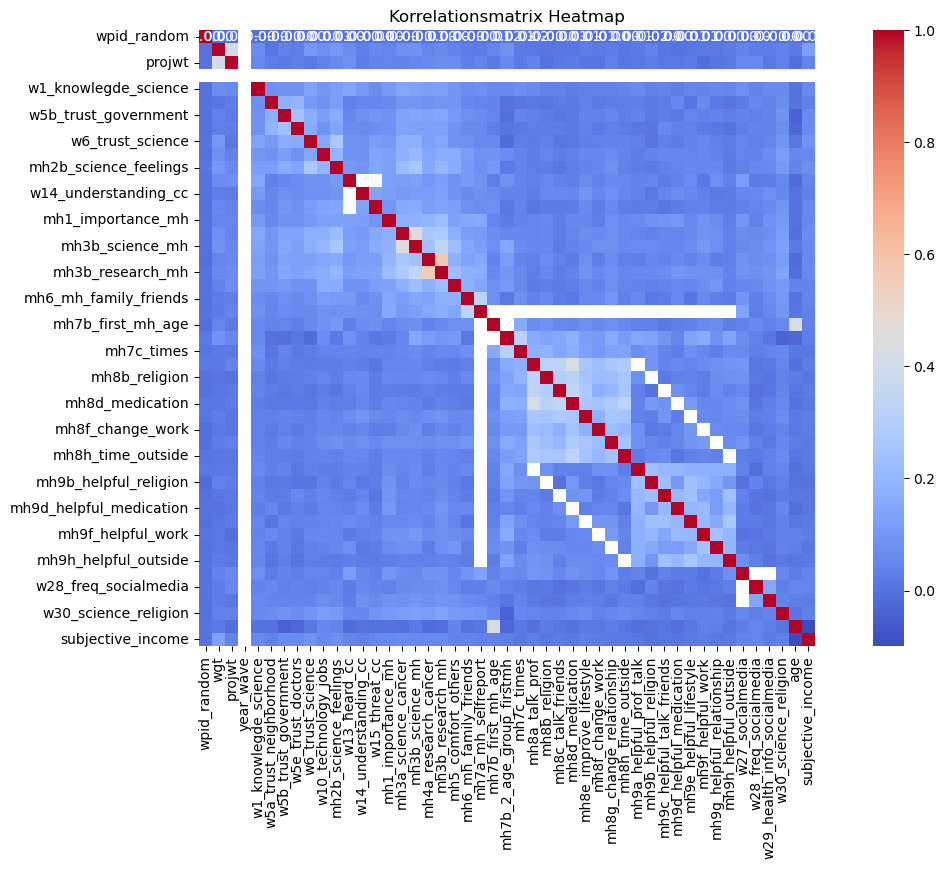

In [11]:
# Check for correlations in a heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korrelationsmatrix Heatmap')
plt.show()

In [12]:
wellcome.columns

Index(['country', 'wpid_random', 'wgt', 'projwt', 'field_date', 'year_wave',
       'w1_knowlegde_science', 'w5a_trust_neighborhood',
       'w5b_trust_government', 'w5e_trust_doctors', 'w6_trust_science',
       'w10_technology_jobs', 'mh2b_science_feelings', 'w13_heard_cc',
       'w14_understanding_cc', 'w15_threat_cc', 'mh1_importance_mh',
       'mh3a_science_cancer', 'mh3b_science_mh', 'mh4a_research_cancer',
       'mh3b_research_mh', 'mh5_comfort_others', 'mh6_mh_family_friends',
       'mh7a_mh_selfreport', 'mh7b_first_mh_age', 'mh7b_2_age_group_firstmh',
       'mh7c_times', 'mh8a_talk_prof', 'mh8b_religion', 'mh8c_talk_friends',
       'mh8d_medication', 'mh8e_improve_lifestyle', 'mh8f_change_work',
       'mh8g_change_relationship', 'mh8h_time_outside',
       'mh9a_helpful_prof_talk', 'mh9b_helpful_religion',
       'mh9c_helpful_talk_friends', 'mh9d_helpful_medication',
       'mh9e_helpful_lifestyle', 'mh9f_helpful_work',
       'mh9g_helpful_relationship', 'mh9h_helpful

In [13]:
# new positioning of the columns

wellcome = wellcome[['country', 'code',
                     'w1_knowlegde_science', 'w5a_trust_neighborhood',
                     'w5b_trust_government', 'w5e_trust_doctors', 'w6_trust_science',
                     'w10_technology_jobs', 'mh2b_science_feelings', 'w13_heard_cc',
                     'w14_understanding_cc', 'w15_threat_cc', 'mh1_importance_mh',
                     'mh3a_science_cancer', 'mh3b_science_mh', 'mh4a_research_cancer',
                     'mh3b_research_mh', 'mh5_comfort_others', 'mh6_mh_family_friends',
                     'mh7a_mh_selfreport', 'mh7b_first_mh_age', 'mh7b_2_age_group_firstmh',
                     'mh7c_times', 'mh8a_talk_prof', 'mh8b_religion', 'mh8c_talk_friends',
                     'mh8d_medication', 'mh8e_improve_lifestyle', 'mh8f_change_work',
                     'mh8g_change_relationship', 'mh8h_time_outside',
                     'mh9a_helpful_prof_talk', 'mh9b_helpful_religion',
                     'mh9c_helpful_talk_friends', 'mh9d_helpful_medication',
                     'mh9e_helpful_lifestyle', 'mh9f_helpful_work',
                     'mh9g_helpful_relationship', 'mh9h_helpful_outside', 'w27_socialmedia',
                     'w28_freq_socialmedia', 'w29_health_info_socialmedia',
                     'w30_science_religion', 'age_mh', 'age', 'age_var1', 'age_var2',
                     'age_var3', 'gender', 'education', 'household_income',
                     'global11regions', 'wbi', 'subjective_income', 'emp_2010', 'wpid_random', 'wgt', 
                     'projwt', 'field_date', 'year_wave']]

In [14]:
wellcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   country                      119088 non-null  object 
 1   code                         119088 non-null  object 
 2   w1_knowlegde_science         119088 non-null  float64
 3   w5a_trust_neighborhood       119088 non-null  float64
 4   w5b_trust_government         110566 non-null  float64
 5   w5e_trust_doctors            119088 non-null  float64
 6   w6_trust_science             119088 non-null  float64
 7   w10_technology_jobs          119088 non-null  float64
 8   mh2b_science_feelings        119088 non-null  float64
 9   w13_heard_cc                 119088 non-null  float64
 10  w14_understanding_cc         100381 non-null  float64
 11  w15_threat_cc                100381 non-null  float64
 12  mh1_importance_mh            119088 non-null  float64
 13 

In [15]:
wellcome.describe()

,w1_knowlegde_science,w5a_trust_neighborhood,w5b_trust_government,w5e_trust_doctors,w6_trust_science,w10_technology_jobs,mh2b_science_feelings,w13_heard_cc,w14_understanding_cc,w15_threat_cc,...,w27_socialmedia,w28_freq_socialmedia,w29_health_info_socialmedia,w30_science_religion,age,subjective_income,wpid_random,wgt,projwt,year_wave
count,119088.000000,119088.000000,110566.000000,119088.000000,119088.000000,119088.000000,119088.000000,119088.000000,100381.000000,100381.000000,...,119088.000000,97080.000000,97080.000000,98006.000000,119088.000000,119088.000000,1.190880e+05,119088.000000,1.190880e+05,119088.0
mean,3.697476,5.249110,7.373605,3.580949,7.524352,9.546461,11.499664,2.062836,2.698568,4.075164,...,1.396581,3.576926,3.350113,6.466349,40.121994,2.223960,1.611876e+08,1.000000,4.296261e+04,2020.0
std,11.221262,17.365374,21.339899,13.292247,23.048349,26.872766,28.762529,9.417935,8.129532,15.982151,...,4.581871,7.190100,8.150966,20.663945,17.302497,1.039213,2.885808e+07,0.944221,1.302623e+05,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,1.111125e+08,0.065294,6.255681e+01,2020.0
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,26.000000,1.000000,1.361847e+08,0.350012,2.707877e+03,2020.0
50%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,1.000000,3.000000,3.000000,2.000000,36.000000,2.000000,1.612003e+08,0.666777,8.319920e+03,2020.0
75%,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,...,1.000000,4.000000,3.000000,2.000000,52.000000,3.000000,1.862597e+08,1.291235,2.927245e+04,2020.0
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,100.000000,6.000000,2.111108e+08,8.668673,1.729255e+06,2020.0


#### 3. Export the clean dataset to SQL-Database

In [40]:
schema = 'cgn_analytics_24_1' 
engine = get_engine() 

def export_table(df, name):
    global engine
    table_name = f'mindscape_{name}'
    if engine!=None:
        try:
            df.to_sql(name=table_name, # Name of SQL table
                    con=engine, # Engine or connection
                    if_exists='replace', # Drop the table before inserting new values 
                schema=schema, # Use schmea that was defined earlier
                    index=False, # Write DataFrame index as a column
                    chunksize=5000, # Specify the number of rows in each batch to be written at a time
                    method='multi') # Pass multiple values in a single INSERT clause
            print(f"The {table_name} table was imported successfully.")
    # Error handling
        except (Exception, psycopg2.DatabaseError) as error:
            print(error)
            engine = None

In [41]:
export_table(wellcome, 'wellcome')

The mindscape_wellcome table was imported successfully.
